In [ ]:
import numpy as np
import pandas as pd

In [ ]:
## 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = '/content/drive/MyDrive/Time Series/df_vacation.csv'
vacation = pd.read_csv(datapath, index_col=0, parse_dates=True)
vacation

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89
...,...
2019-06-01,58
2019-07-01,56
2019-08-01,45


### Create lagged variables

In [ ]:
new_df = pd.DataFrame()

In [ ]:
for i in range(12,0,-1):
    new_df[['t-'+str(i)]] = vacation.shift(i)
print(new_df)

            t-12  t-11  t-10   t-9   t-8  ...   t-5   t-4   t-3   t-2   t-1
Month                                     ...                              
2004-01-01   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
2004-02-01   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN  94.0
2004-03-01   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN  94.0  89.0
2004-04-01   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  94.0  89.0  86.0
2004-05-01   NaN   NaN   NaN   NaN   NaN  ...   NaN  94.0  89.0  86.0  79.0
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2019-06-01  62.0  61.0  50.0  38.0  37.0  ...  53.0  50.0  50.0  46.0  47.0
2019-07-01  61.0  50.0  38.0  37.0  41.0  ...  50.0  50.0  46.0  47.0  58.0
2019-08-01  50.0  38.0  37.0  41.0  56.0  ...  50.0  46.0  47.0  58.0  56.0
2019-09-01  38.0  37.0  41.0  56.0  53.0  ...  46.0  47.0  58.0  56.0  45.0
2019-10-01  37.0  41.0  56.0  53.0  50.0  ...  47.0  58.0  56.0  45.0  38.0

[190 rows x

In [ ]:
new_df['t'] = vacation.values

In [ ]:
## Drop Not a Number value
df = new_df.dropna(axis=0, how='any')

In [ ]:
df.to_csv('/content/drive/MyDrive/Time Series/df_vacation_lagged.csv')

## Decision Tree Modle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Time Series/df_vacation_lagged.csv', index_col=0, parse_dates=True)
df

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Month,,,,,,,,,,,,,
2005-01-01,94.0,89.0,86.0,79.0,89.0,98.0,96.0,79.0,61.0,60.0,63.0,67.0,100
2005-02-01,89.0,86.0,79.0,89.0,98.0,96.0,79.0,61.0,60.0,63.0,67.0,100.0,94
2005-03-01,86.0,79.0,89.0,98.0,96.0,79.0,61.0,60.0,63.0,67.0,100.0,94.0,91
2005-04-01,79.0,89.0,98.0,96.0,79.0,61.0,60.0,63.0,67.0,100.0,94.0,91.0,80
2005-05-01,89.0,98.0,96.0,79.0,61.0,60.0,63.0,67.0,100.0,94.0,91.0,80.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,62.0,61.0,50.0,38.0,37.0,41.0,56.0,53.0,50.0,50.0,46.0,47.0,58
2019-07-01,61.0,50.0,38.0,37.0,41.0,56.0,53.0,50.0,50.0,46.0,47.0,58.0,56
2019-08-01,50.0,38.0,37.0,41.0,56.0,53.0,50.0,50.0,46.0,47.0,58.0,56.0,45


In [ ]:
lagged_values = df.values

In [ ]:
X, y = lagged_values[:, 0:-1], lagged_values[:,-1]

In [ ]:
X

array([[ 94.,  89.,  86., ...,  60.,  63.,  67.],
       [ 89.,  86.,  79., ...,  63.,  67., 100.],
       [ 86.,  79.,  89., ...,  67., 100.,  94.],
       ...,
       [ 50.,  38.,  37., ...,  47.,  58.,  56.],
       [ 38.,  37.,  41., ...,  58.,  56.,  45.],
       [ 37.,  41.,  56., ...,  56.,  45.,  38.]])

In [ ]:
y

array([100.,  94.,  91.,  80.,  83.,  96.,  92.,  76.,  56.,  54.,  57.,
        60.,  90.,  79.,  80.,  74.,  75.,  87.,  87.,  69.,  54.,  54.,
        54.,  59.,  89.,  82.,  81.,  73.,  78.,  90.,  86.,  70.,  55.,
        53.,  51.,  55.,  83.,  77.,  76.,  70.,  72.,  83.,  80.,  63.,
        49.,  45.,  48.,  52.,  76.,  70.,  71.,  62.,  69.,  81.,  80.,
        65.,  48.,  46.,  46.,  57.,  75.,  70.,  68.,  61.,  67.,  80.,
        70.,  55.,  40.,  37.,  39.,  46.,  72.,  64.,  62.,  56.,  62.,
        74.,  69.,  56.,  42.,  39.,  40.,  50.,  65.,  59.,  58.,  53.,
        57.,  68.,  64.,  49.,  38.,  35.,  36.,  50.,  59.,  54.,  55.,
        50.,  53.,  63.,  62.,  48.,  38.,  37.,  38.,  50.,  59.,  54.,
        55.,  49.,  53.,  63.,  64.,  50.,  39.,  35.,  38.,  52.,  57.,
        53.,  54.,  49.,  56.,  64.,  75.,  68.,  45.,  39.,  44.,  55.,
        60.,  56.,  56.,  52.,  54.,  64.,  63.,  52.,  40.,  38.,  40.,
        55.,  59.,  55.,  53.,  50.,  53.,  62.,  6

### Train test split

In [ ]:
train_ratio = 0.8
train_size = int(len(X)*train_ratio)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [ ]:
print('Observations for Target: %d' % (len(y)))
print('Training Observations for Target: %d' % (len(train_y)))
print('Testing Observations for Target: %d' % (len(test_y)))

Observations for Target: 178
Training Observations for Target: 142
Testing Observations for Target: 36


In [ ]:
## Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

## Create a decision tree regression model with default arguments
decision_tree_vacat = DecisionTreeRegressor()  # max-depth not set

## Fit the model to the training features and targets
decision_tree_vacat.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print(decision_tree_vacat.score(train_X, train_y))
print(decision_tree_vacat.score(test_X,test_y))  # predictions are horrible if negative value, no relationship if 0

1.0
0.6796277833167166


In [ ]:
## Find the best Max Depth

for d in [2,3, 4, 5,7,8,10]:
    ## Create the tree and fit it
    decision_tree_vacat = DecisionTreeRegressor(max_depth=d)
    decision_tree_vacat.fit(train_X, train_y)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_vacat.score(train_X, train_y))
    print(decision_tree_vacat.score(test_X, test_y), '\n')  # You want the test score to be positive and high

max_depth= 2
0.8746812920327698
0.6595065280817639 

max_depth= 3
0.9281475649841756
0.8398521838394636 

max_depth= 4
0.9533792149685348
0.832906047697129 

max_depth= 5
0.9743472444588708
0.8188101398676207 

max_depth= 7
0.9913488823335996
0.6735088237708419 

max_depth= 8
0.995651812516665
0.6564430457622676 

max_depth= 10
0.9984869254177069
0.6722666467717031 



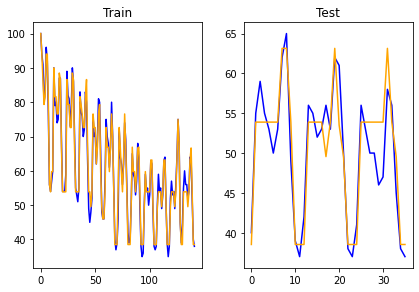

In [ ]:
## Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_vacat = DecisionTreeRegressor(max_depth=5)  # fill in best max depth here
decision_tree_vacat.fit(train_X, train_y)

# Predict values for train and test
train_prediction = decision_tree_vacat.predict(train_X)
test_prediction = decision_tree_vacat.predict(test_X)

fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax1, ax2 = ax
# Scatter the predictions vs actual values
ax1.plot(train_y, color='blue')
ax1.plot(train_prediction, color='orange')
ax1.set_title('Train')
ax2.plot(test_y, color='blue')
ax2.plot(test_prediction, color='orange')
ax2.set_title('Test')
plt.show()

## Random Forest

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor

## Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)  # n_estimators is the number of trees in forest
rfr.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
from sklearn.model_selection import ParameterGrid
import numpy as np

## Run grid search
grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_X, train_y)
    test_scores.append(rfr.score(test_X, test_y))

## Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx]) 

0.8528158047317987 {'n_estimators': 200, 'max_features': 12, 'max_depth': 3}


In [60]:
## Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=12)
rfr.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

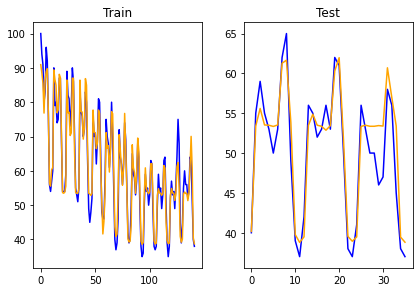

In [61]:
# Predict values for train and test
train_prediction = rfr.predict(train_X)
test_prediction = rfr.predict(test_X)

fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax1, ax2 = ax
# Scatter the predictions vs actual values
ax1.plot(train_y, color='blue')
ax1.plot(train_prediction, color='orange')
ax1.set_title('Train')
ax2.plot(test_y, color='blue')
ax2.plot(test_prediction, color='orange')
ax2.set_title('Test')
plt.show()

## Gradient Boosted Tree

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_features=2,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_X, train_y)

print(gbr.score(train_X, train_y))
print(gbr.score(test_X, test_y))

0.9787980362159161
0.8267230168539234


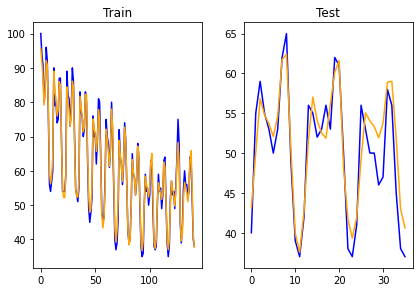

In [66]:
# Predict values for train and test
train_prediction = gbr.predict(train_X)
test_prediction = gbr.predict(test_X)

fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax1, ax2 = ax
# Scatter the predictions vs actual values
ax1.plot(train_y, color='blue')
ax1.plot(train_prediction, color='orange')
ax1.set_title('Train')
ax2.plot(test_y, color='blue')
ax2.plot(test_prediction, color='orange')
ax2.set_title('Test')
plt.show()

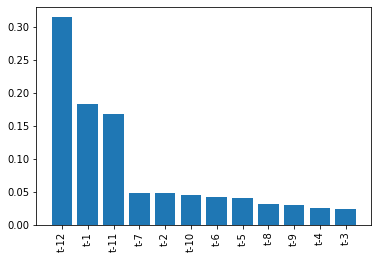

In [65]:
## Gradient Boosted Model Feature Importance
## Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

## Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(train_X.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

## Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

## XGBoost

In [69]:
from xgboost import XGBRegressor

In [72]:
model = XGBRegressor(colsample_bylevel=1, colsample_bytree=1, learning_rate=0.1,
                    max_depth=3, min_child_weight=1)
model.fit(train_X, train_y)
print(model.score(train_X, train_y))
print(model.score(test_X, test_y))

[08:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.991206002110815
0.8175903893910934


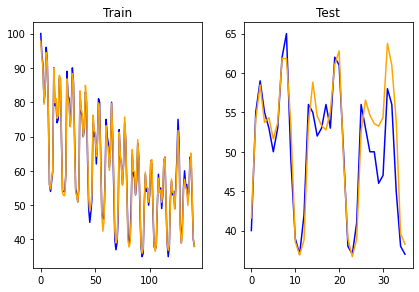

In [73]:
# Predict values for train and test
train_prediction = model.predict(train_X)
test_prediction = model.predict(test_X)

fig, ax = plt.subplots(1,2)
fig.tight_layout()
ax1, ax2 = ax
# Scatter the predictions vs actual values
ax1.plot(train_y, color='blue')
ax1.plot(train_prediction, color='orange')
ax1.set_title('Train')
ax2.plot(test_y, color='blue')
ax2.plot(test_prediction, color='orange')
ax2.set_title('Test')
plt.show()

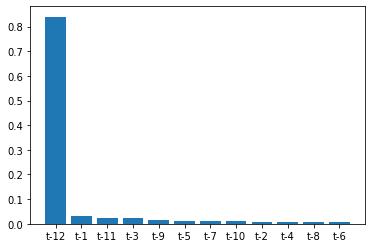

In [76]:
## Extract feature importances from the fitted XGB gradient boosting model
feature_importances = model.feature_importances_

## Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(train_X.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]ㄴ

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

## Set the tick lables to be the feature names, according to the sorted feature_idx
#plt.xticks(rotation=90)
plt.show()